In [1]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
from datetime import date,timedelta
import datetime as dt




import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


from sklearn.preprocessing import scale


from sklearn.cluster import KMeans


from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [171]:
df = pd.read_csv('num3.csv')
df


Номенклатура3       №    Номер карты  \
0                               Сметана   52824  2200095914323   
1                                Молоко  102826  2200600024729   
2                                Зелень   54491  2200095929649   
3                                 Овощи   54323  2200095929649   
4                 Упаковочные материалы   54326  2200095929649   
...                                 ...     ...            ...   
11436                Бумажная продукция  106714  2200600330820   
11437  Консервы из рыбы и морепродуктов  106376  2200700124305   
11438       Сухие завтраки, каши, мюсли  105354  2200500132111   
11439                Масло растительное  105355  2200500132111   
11440                  Сгущенное молоко  105376  2200500132111   

                                        Маркет Номер Чека  Номенклатура.Код  \
0                Гипермаркет-12 (12 мкр Арзан)    388,357            102303   
1                          Гипермаркет-29 (BP)    422,604             23552   
2                     Гипермаркет-26 (Ак-Орго)    277,066             77314   
3                     Гипермаркет-26 (Ак-Орго)    277,066             76973   
4                     Гипермаркет-26 (Ак-Орго)    277,066             97671   
...                                        ...        ...               ...   
11436               Гипермаркет-38 (Элебесова)    230,894             71629   
11437                   Гипермаркет-24 (Манас)    456,623            172089   
11438  Гипермаркет-47 (ул. Махатма Ганди, 334)    253,418            172111   
11439  Гипермаркет-47 (ул. Махатма Ганди, 334)    253,418            172850   
11440  Гипермаркет-47 (ул. Махатма Ганди, 334)    253,418            162042   

           Дата Время Чека  Количество   Сумма        Дата  Время  \
0      01.11.2021 15:17:00        1.00   42.72  2021-11-01   15.0   
1      01.11.2021 19:27:00        1.00   44.00  2021-11-01   19.0   
2      01.11.2021 17:53:00        1.00   15.52  2021-11-01   17.0   
3      01.11.2021 17:53:00        0.34   30.00  2021-11-01   17.0   
4      01.11.2021 17:53:00        5.00   14.55  2021-11-01   17.0   
...                    ...         ...     ...         ...    ...   
11436  30.01.2022 22:24:00        1.00   23.99  2022-01-30   22.0   
11437  30.01.2022 11:44:00        1.00   77.11  2022-01-30   11.0   
11438  30.01.2022 13:05:00        1.00   86.00  2022-01-30   13.0   
11439  30.01.2022 13:05:00        2.00  238.00  2022-01-30   13.0   
11440  30.01.2022 13:05:00        1.00   66.01  2022-01-30   13.0   

                                     Наименование Товара  \
0                  СМЕТАНА БЕЛАЯ РЕКА 15% П/СТАКАН 180ГР   
1                         МОЛОКО УМУТ ПАСТЕРИЗОВ 3,2% 1Л   
2                                    ЗЕЛЕНЬ УКРОП 1ПУЧОК   
3                             ПЕРЕЦ ЛАСТОЧКА КРАСНЫЙ ВЕС   
4                             ПАКЕТ ФРУНЗЕ БИО(36*60)БОЛ   
...                                                  ...   
11436                                 КНИЖКА МЕДИЦИНСКАЯ   
11437            САРДИНА АЗБУКА МОРЯ ИВАСИ В МАСЛЕ 245ГР   
11438       ПАЛОЧКИ КУКУРУЗНЫЕ СЛАСТЕНА С ИГРУШКОЙ 200ГР   
11439        МАСЛО РАСТИТЕЛЬНОЕ БОГАТОВСКОЕ ЗОЛОТО 800МЛ   
11440  ПРОДУКТ СГУЩЕННЫЙ С САХАРОМ СГУЩЕНОЧКА 2,5% 45...   

                       Номенклатура1                    Номенклатура2  \
0               Сметана фас 170-200г               Сметана фасованная   
1         Молоко пастеризованное п/п           Молоко пастеризованное   
2                 Зелень упакованная               Зелень упакованная   
3                              Перцы                            Перцы   
4                Пакеты Фрунзе,Оазиз              Пакеты для хранения   
...                              ...                              ...   
11436    Книжки трудовые,медицинские       Блокноты и записные книжки   
11437       Консервы из рыбы сардины         Консервы из рыбы в масле   
11438    Палочки кукурузные 200-250г               Палочки кукурузные   
1143

In [3]:
df.columns

Index(['Номенклатура3', '№', 'Номер карты', 'Маркет', 'Номер Чека',
       'Номенклатура.Код', 'Дата Время Чека', 'Количество', 'Сумма', 'Дата',
       'Время', 'Наименование Товара', 'Номенклатура1', 'Номенклатура2',
       'Категория', 'Тип товара'],
      dtype='object')

In [4]:
df["Номер карты"] = df["Номер карты"].astype('int64')

In [5]:
df["Сумма"] = df["Сумма"].astype('float')
df["Номенклатура.Код"] = df["Номенклатура.Код"].astype('int')
df = df[df.select_dtypes(include=[np.number]).ge(0).all(1)]
df['Дата Время Чека'] = pd.to_datetime(df['Дата Время Чека'], infer_datetime_format=True)
df["Количество"] = df["Количество"].astype('float')

<ipython-input-5-0dead8f4e816>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Дата Время Чека'] = pd.to_datetime(df['Дата Время Чека'], infer_datetime_format=True)
<ipython-input-5-0dead8f4e816>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Количество"] = df["Количество"].astype('float')


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11434 entries, 0 to 11440
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Номенклатура3        11434 non-null  object        
 1   №                    11434 non-null  int64         
 2   Номер карты          11434 non-null  int64         
 3   Маркет               11434 non-null  object        
 4   Номер Чека           11434 non-null  object        
 5   Номенклатура.Код     11434 non-null  int32         
 6   Дата Время Чека      11434 non-null  datetime64[ns]
 7   Количество           11434 non-null  float64       
 8   Сумма                11434 non-null  float64       
 9   Дата                 11434 non-null  object        
 10  Время                11434 non-null  float64       
 11  Наименование Товара  11434 non-null  object        
 12  Номенклатура1        11395 non-null  object        
 13  Номенклатура2        11434 non-

In [7]:
df['Категория'].unique()

array(['Молочные продукты', 'Свежие фрукты, овощи, ягоды, грибы',
       'Хозтовары', 'Хлеб, хлебопродукты', 'Гастрономия и кулинария',
       'Средства гигиены', 'Масло растительное', 'Бакалея',
       'Кондитерские изделия', 'Безалкогольные напитки, соки', nan,
       'Алкогольные напитки, пиво', 'Кофе, кофейные напитки, чай',
       'Замороженные продукты', 'Бытовая химия', 'Консервы',
       'Табачные изделия и аксессуары', 'Косметика и парфюмерия',
       'Товары для дома', 'Канцелярские принадлежности',
       'Товары для животных', 'Детское питание',
       'Средства личной гигиены для детей'], dtype=object)

In [8]:
df

Номенклатура3       №    Номер карты  \
0                               Сметана   52824  2200095914323   
1                                Молоко  102826  2200600024729   
2                                Зелень   54491  2200095929649   
3                                 Овощи   54323  2200095929649   
4                 Упаковочные материалы   54326  2200095929649   
...                                 ...     ...            ...   
11436                Бумажная продукция  106714  2200600330820   
11437  Консервы из рыбы и морепродуктов  106376  2200700124305   
11438       Сухие завтраки, каши, мюсли  105354  2200500132111   
11439                Масло растительное  105355  2200500132111   
11440                  Сгущенное молоко  105376  2200500132111   

                                        Маркет Номер Чека  Номенклатура.Код  \
0                Гипермаркет-12 (12 мкр Арзан)    388,357            102303   
1                          Гипермаркет-29 (BP)    422,604             23552   
2                     Гипермаркет-26 (Ак-Орго)    277,066             77314   
3                     Гипермаркет-26 (Ак-Орго)    277,066             76973   
4                     Гипермаркет-26 (Ак-Орго)    277,066             97671   
...                                        ...        ...               ...   
11436               Гипермаркет-38 (Элебесова)    230,894             71629   
11437                   Гипермаркет-24 (Манас)    456,623            172089   
11438  Гипермаркет-47 (ул. Махатма Ганди, 334)    253,418            172111   
11439  Гипермаркет-47 (ул. Махатма Ганди, 334)    253,418            172850   
11440  Гипермаркет-47 (ул. Махатма Ганди, 334)    253,418            162042   

          Дата Время Чека  Количество   Сумма        Дата  Время  \
0     2021-01-11 15:17:00        1.00   42.72  2021-11-01   15.0   
1     2021-01-11 19:27:00        1.00   44.00  2021-11-01   19.0   
2     2021-01-11 17:53:00        1.00   15.52  2021-11-01   17.0   
3     2021-01-11 17:53:00        0.34   30.00  2021-11-01   17.0   
4     2021-01-11 17:53:00        5.00   14.55  2021-11-01   17.0   
...                   ...         ...     ...         ...    ...   
11436 2022-01-30 22:24:00        1.00   23.99  2022-01-30   22.0   
11437 2022-01-30 11:44:00        1.00   77.11  2022-01-30   11.0   
11438 2022-01-30 13:05:00        1.00   86.00  2022-01-30   13.0   
11439 2022-01-30 13:05:00        2.00  238.00  2022-01-30   13.0   
11440 2022-01-30 13:05:00        1.00   66.01  2022-01-30   13.0   

                                     Наименование Товара  \
0                  СМЕТАНА БЕЛАЯ РЕКА 15% П/СТАКАН 180ГР   
1                         МОЛОКО УМУТ ПАСТЕРИЗОВ 3,2% 1Л   
2                                    ЗЕЛЕНЬ УКРОП 1ПУЧОК   
3                             ПЕРЕЦ ЛАСТОЧКА КРАСНЫЙ ВЕС   
4                             ПАКЕТ ФРУНЗЕ БИО(36*60)БОЛ   
...                                                  ...   
11436                                 КНИЖКА МЕДИЦИНСКАЯ   
11437            САРДИНА АЗБУКА МОРЯ ИВАСИ В МАСЛЕ 245ГР   
11438       ПАЛОЧКИ КУКУРУЗНЫЕ СЛАСТЕНА С ИГРУШКОЙ 200ГР   
11439        МАСЛО РАСТИТЕЛЬНОЕ БОГАТОВСКОЕ ЗОЛОТО 800МЛ   
11440  ПРОДУКТ СГУЩЕННЫЙ С САХАРОМ СГУЩЕНОЧКА 2,5% 45...   

                       Номенклатура1                    Номенклатура2  \
0               Сметана фас 170-200г               Сметана фасованная   
1         Молоко пастеризованное п/п           Молоко пастеризованное   
2                 Зелень упакованная               Зелень упакованная   
3                              Перцы                            Перцы   
4                Пакеты Фрунзе,Оазиз              Пакеты для хранения   
...                              ...                              ...   
11436    Книжки трудовые,медицинские       Блокноты и записные книжки   
11437       Консервы из рыбы сардины         Консервы из рыбы в масле   
11438    Палочки кукурузные 200-250г               Палочки кукурузные   
11439       Масл

In [9]:
#monetary value

df['Всего'] = df['Количество']*df['Сумма']
df[['Всего']]

<ipython-input-9-c6a54d40b9ee>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Всего'] = df['Количество']*df['Сумма']


Всего
0       42.72
1       44.00
2       15.52
3       10.20
4       72.75
...       ...
11436   23.99
11437   77.11
11438   86.00
11439  476.00
11440   66.01

[11434 rows x 1 columns]

In [10]:
#monetary
m = df.groupby('Номер карты')['Всего'].sum()
m = pd.DataFrame(m).reset_index()
m

Номер карты       Всего
0    2000958295742   1969.7546
1    2000958297731  23574.6501
2    2000958298665    272.5000
3    2000958298975    107.6460
4    2000958299032   6049.4535
..             ...         ...
233  2200700495313    552.1800
234  2200700495818   6472.4407
235  2200700496280    372.1980
236  2200700496389   1286.5882
237  2200700497164    875.2347

[238 rows x 2 columns]

In [11]:
#frequency

freq = df.groupby('Номер карты')['Дата Время Чека'].count()
f = pd.DataFrame(freq).reset_index()
f

Номер карты  Дата Время Чека
0    2000958295742               24
1    2000958297731              285
2    2000958298665                9
3    2000958298975                2
4    2000958299032               28
..             ...              ...
233  2200700495313                9
234  2200700495818               33
235  2200700496280                6
236  2200700496389               17
237  2200700497164               14

[238 rows x 2 columns]

In [12]:
#recency

df_recency = df.groupby(by='Номер карты',
                        as_index=False)['Дата Время Чека'].max()
df_recency

Номер карты     Дата Время Чека
0    2000958295742 2021-12-28 18:17:00
1    2000958297731 2022-12-01 07:58:00
2    2000958298665 2021-04-11 20:16:00
3    2000958298975 2022-01-26 19:04:00
4    2000958299032 2021-12-29 18:08:00
..             ...                 ...
233  2200700495313 2022-01-28 11:35:00
234  2200700495818 2022-04-01 22:06:00
235  2200700496280 2022-01-18 14:50:00
236  2200700496389 2022-01-19 19:50:00
237  2200700497164 2022-09-01 18:46:00

[238 rows x 2 columns]

In [13]:

df_recency = df.groupby(by='Номер карты',
                        as_index=False)['Дата Время Чека'].max()
df_recency.columns = ['Номер карты', 'LastPurchaseDate']
recent_date = df_recency['LastPurchaseDate'].max()
df_recency['recency'] = df_recency['LastPurchaseDate'].apply(
    lambda x: (recent_date - x).days)
df_recency.head()

Номер карты    LastPurchaseDate  recency
0  2000958295742 2021-12-28 18:17:00      338
1  2000958297731 2022-12-01 07:58:00        0
2  2000958298665 2021-04-11 20:16:00      599
3  2000958298975 2022-01-26 19:04:00      309
4  2000958299032 2021-12-29 18:08:00      337

In [14]:
recency = df_recency.copy()

In [15]:
recency.drop(columns=['LastPurchaseDate'])

Номер карты  recency
0    2000958295742      338
1    2000958297731        0
2    2000958298665      599
3    2000958298975      309
4    2000958299032      337
..             ...      ...
233  2200700495313      307
234  2200700495818      244
235  2200700496280      317
236  2200700496389      316
237  2200700497164       91

[238 rows x 2 columns]

In [16]:
RFM = f.merge(m, on = "Номер карты")
RFM = RFM.merge(recency, on = "Номер карты")
RFM.head()
RFM

Номер карты  Дата Время Чека       Всего    LastPurchaseDate  recency
0    2000958295742               24   1969.7546 2021-12-28 18:17:00      338
1    2000958297731              285  23574.6501 2022-12-01 07:58:00        0
2    2000958298665                9    272.5000 2021-04-11 20:16:00      599
3    2000958298975                2    107.6460 2022-01-26 19:04:00      309
4    2000958299032               28   6049.4535 2021-12-29 18:08:00      337
..             ...              ...         ...                 ...      ...
233  2200700495313                9    552.1800 2022-01-28 11:35:00      307
234  2200700495818               33   6472.4407 2022-04-01 22:06:00      244
235  2200700496280                6    372.1980 2022-01-18 14:50:00      317
236  2200700496389               17   1286.5882 2022-01-19 19:50:00      316
237  2200700497164               14    875.2347 2022-09-01 18:46:00       91

[238 rows x 5 columns]

In [17]:
RFM.columns

Index(['Номер карты', 'Дата Время Чека', 'Всего', 'LastPurchaseDate',
       'recency'],
      dtype='object')

In [18]:
RFM.rename({'Номер карты': 'CustomerID', 'Дата Время Чека': 'frequency','Всего': 'monetary' }, axis=1, inplace=True)
RFM

CustomerID  frequency    monetary    LastPurchaseDate  recency
0    2000958295742         24   1969.7546 2021-12-28 18:17:00      338
1    2000958297731        285  23574.6501 2022-12-01 07:58:00        0
2    2000958298665          9    272.5000 2021-04-11 20:16:00      599
3    2000958298975          2    107.6460 2022-01-26 19:04:00      309
4    2000958299032         28   6049.4535 2021-12-29 18:08:00      337
..             ...        ...         ...                 ...      ...
233  2200700495313          9    552.1800 2022-01-28 11:35:00      307
234  2200700495818         33   6472.4407 2022-04-01 22:06:00      244
235  2200700496280          6    372.1980 2022-01-18 14:50:00      317
236  2200700496389         17   1286.5882 2022-01-19 19:50:00      316
237  2200700497164         14    875.2347 2022-09-01 18:46:00       91

[238 rows x 5 columns]

In [19]:
rfm = RFM.copy()
rfm.drop(columns=['LastPurchaseDate'])

CustomerID  frequency    monetary  recency
0    2000958295742         24   1969.7546      338
1    2000958297731        285  23574.6501        0
2    2000958298665          9    272.5000      599
3    2000958298975          2    107.6460      309
4    2000958299032         28   6049.4535      337
..             ...        ...         ...      ...
233  2200700495313          9    552.1800      307
234  2200700495818         33   6472.4407      244
235  2200700496280          6    372.1980      317
236  2200700496389         17   1286.5882      316
237  2200700497164         14    875.2347       91

[238 rows x 4 columns]

In [20]:
rfm_r = rfm.copy()

In [21]:
#Ranking Customer’s based upon their recency, frequency, and monetary score
rfm_r['R_rank'] = rfm_r['recency'].rank(ascending=False)
rfm_r['F_rank'] = rfm_r['frequency'].rank(ascending=True)
rfm_r['M_rank'] = rfm_r['monetary'].rank(ascending=True)
 
# normalizing the rank of the customers
rfm_r['R_rank_norm'] = (rfm_r['R_rank']/rfm_r['R_rank'].max())*100
rfm_r['F_rank_norm'] = (rfm_r['F_rank']/rfm_r['F_rank'].max())*100
rfm_r['M_rank_norm'] = (rfm_r['F_rank']/rfm_r['M_rank'].max())*100
 
rfm_r.drop(columns=['R_rank', 'F_rank', 'M_rank'], inplace=True)
 
rfm_r.head()

CustomerID  frequency    monetary    LastPurchaseDate  recency  \
0  2000958295742         24   1969.7546 2021-12-28 18:17:00      338   
1  2000958297731        285  23574.6501 2022-12-01 07:58:00        0   
2  2000958298665          9    272.5000 2021-04-11 20:16:00      599   
3  2000958298975          2    107.6460 2022-01-26 19:04:00      309   
4  2000958299032         28   6049.4535 2021-12-29 18:08:00      337   

   R_rank_norm  F_rank_norm  M_rank_norm  
0     7.982262    40.756303    40.756303  
1   100.000000    99.159664    99.159664  
2     0.443459    21.218487    21.218487  
3    33.259424     5.252101     5.252101  
4     8.425721    45.168067    45.168067

In [22]:
#Calculating RFM score
rfm_r['RFM_Score'] = 0.15*rfm_r['R_rank_norm']+0.28 * \
    rfm_r['F_rank_norm']+0.57*rfm_r['M_rank_norm']
rfm_r['RFM_Score'] *= 0.05
rfm_r = rfm_r.round(2)
rfm_r[['CustomerID', 'RFM_Score']].head(7)

CustomerID  RFM_Score
0  2000958295742       1.79
1  2000958297731       4.96
2  2000958298665       0.91
3  2000958298975       0.47
4  2000958299032       1.98
5  2000958314671       3.52
6  2000958318088       4.77

In [23]:
rfm_r

CustomerID  frequency  monetary    LastPurchaseDate  recency  \
0    2000958295742         24   1969.75 2021-12-28 18:17:00      338   
1    2000958297731        285  23574.65 2022-12-01 07:58:00        0   
2    2000958298665          9    272.50 2021-04-11 20:16:00      599   
3    2000958298975          2    107.65 2022-01-26 19:04:00      309   
4    2000958299032         28   6049.45 2021-12-29 18:08:00      337   
..             ...        ...       ...                 ...      ...   
233  2200700495313          9    552.18 2022-01-28 11:35:00      307   
234  2200700495818         33   6472.44 2022-04-01 22:06:00      244   
235  2200700496280          6    372.20 2022-01-18 14:50:00      317   
236  2200700496389         17   1286.59 2022-01-19 19:50:00      316   
237  2200700497164         14    875.23 2022-09-01 18:46:00       91   

     R_rank_norm  F_rank_norm  M_rank_norm  RFM_Score  
0           7.98        40.76        40.76       1.79  
1         100.00        99.16        99.16       4.96  
2           0.44        21.22        21.22       0.91  
3          33.26         5.25         5.25       0.47  
4           8.43        45.17        45.17       1.98  
..           ...          ...          ...        ...  
233        39.47        21.22        21.22       1.20  
234        51.00        48.95        48.95       2.46  
235        18.40        13.45        13.45       0.71  
236        19.51        34.24        34.24       1.60  
237        73.39        30.04        30.04       1.83  

[238 rows x 9 columns]

In [24]:
#Rating Customer based upon the RFM score
#rfm score >4.5 : Top Customer
#4.5 > rfm score > 4 : High Value Customer
#4>rfm score >3 : Medium value customer
#3>rfm score>1.6 : Low-value customer
#rfm score<1.6 :Lost Customer

rfm_r["Customer_segment"] = np.where(rfm_r['RFM_Score'] >
                                      4.5, "Top Customers",
                                      (np.where(
                                        rfm_r['RFM_Score'] > 4,
                                        "High value Customer",
                                        (np.where(
    rfm_r['RFM_Score'] > 3,
                             "Medium Value Customer",
                             np.where(rfm_r['RFM_Score'] > 1.6,
                            'Low Value Customers', 'Lost Customers'))))))
rfm_r[['CustomerID', 'RFM_Score', 'Customer_segment']].head(20)

CustomerID  RFM_Score       Customer_segment
0   2000958295742       1.79    Low Value Customers
1   2000958297731       4.96          Top Customers
2   2000958298665       0.91         Lost Customers
3   2000958298975       0.47         Lost Customers
4   2000958299032       1.98    Low Value Customers
5   2000958314671       3.52  Medium Value Customer
6   2000958318088       4.77          Top Customers
7   2000958318974       3.72  Medium Value Customer
8   2000958319459       2.49    Low Value Customers
9   2000958319757       3.32  Medium Value Customer
10  2000958320433       4.68          Top Customers
11  2000958321432       2.86    Low Value Customers
12  2000958321602       4.06    High value Customer
13  2000958322392       0.63         Lost Customers
14  2000958322797       3.60  Medium Value Customer
15  2000958322952       1.68    Low Value Customers
16  2000958324220       1.37         Lost Customers
17  2000958324391       3.07  Medium Value Customer
18  2000958324641       3.35  Medium Value Customer
19  2000958324951       4.34    High value Customer

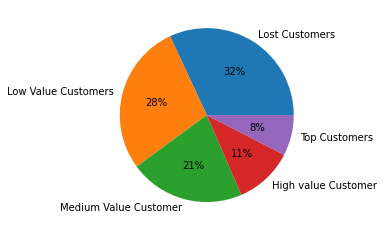

In [25]:
plt.pie(rfm_r.Customer_segment.value_counts(),
        labels=rfm_r.Customer_segment.value_counts().index,
        autopct='%.0f%%')
plt.show()

In [26]:
rfm = rfm.drop(columns = ['LastPurchaseDate'])


In [27]:
rfm

CustomerID  frequency    monetary  recency
0    2000958295742         24   1969.7546      338
1    2000958297731        285  23574.6501        0
2    2000958298665          9    272.5000      599
3    2000958298975          2    107.6460      309
4    2000958299032         28   6049.4535      337
..             ...        ...         ...      ...
233  2200700495313          9    552.1800      307
234  2200700495818         33   6472.4407      244
235  2200700496280          6    372.1980      317
236  2200700496389         17   1286.5882      316
237  2200700497164         14    875.2347       91

[238 rows x 4 columns]

In [28]:
# standardise all parameters
RFM_norm1 = rfm.drop(["CustomerID"], axis=1)

from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
RFM_norm1 = standard_scaler.fit_transform(RFM_norm1)

In [29]:
RFM_norm1 = pd.DataFrame(RFM_norm1)
RFM_norm1.columns = ['Frequency','Amount','Recency']
RFM_norm1.head()

Frequency    Amount   Recency
0  -0.436442 -0.477704  1.037238
1   4.301570  1.819303 -1.504481
2  -0.708742 -0.658154  2.999926
3  -0.835815 -0.675681  0.819161
4  -0.363829 -0.043955  1.029718

In [139]:
# Kmeans with K=5
model_clus5 = KMeans(n_clusters = 5, max_iter=500)
model_clus5.fit(RFM_norm1)

KMeans(max_iter=500, n_clusters=5)

In [140]:
from sklearn.metrics import silhouette_score
sse_ = []
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k).fit(RFM_norm1)
    sse_.append([k, silhouette_score(RFM_norm1, kmeans.labels_)])

In [141]:
sse_

[[2, 0.5363942580056156],
 [3, 0.5041603212081167],
 [4, 0.5042354914120518],
 [5, 0.5078941731971834],
 [6, 0.44533700716108243],
 [7, 0.45116524734288044],
 [8, 0.40468720167394057],
 [9, 0.4011717360515555],
 [10, 0.38902970671430115],
 [11, 0.42385223503986413],
 [12, 0.42961028683001734],
 [13, 0.4207638334603408],
 [14, 0.4105096501129847]]

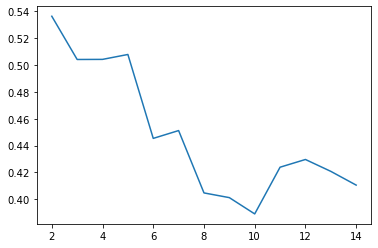

In [142]:
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1]);

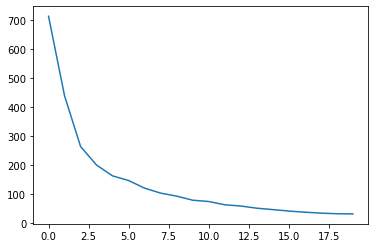

In [143]:
# sum of squared distances
ssd = []
for num_clusters in list(range(1,21)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50)
    model_clus.fit(RFM_norm1)
    ssd.append(model_clus.inertia_)

plt.plot(ssd)

In [144]:
pd.RangeIndex(len(RFM.index))

RangeIndex(start=0, stop=238, step=1)

In [145]:
RFM_km = pd.concat([rfm, pd.Series(model_clus5.labels_)], axis=1)
RFM_km.columns = ['CustomerID', 'Frequency', 'Amount', 'Recency', 'ClusterID']


km_clusters_amount = pd.DataFrame(RFM_km.groupby(["ClusterID"]).Amount.mean())
km_clusters_frequency = pd.DataFrame(RFM_km.groupby(["ClusterID"]).Frequency.mean())
km_clusters_recency = pd.DataFrame(RFM_km.groupby(["ClusterID"]).Recency.mean())

In [146]:
RFM_km

CustomerID  Frequency      Amount  Recency  ClusterID
0    2000958295742         24   1969.7546      338          0
1    2000958297731        285  23574.6501        0          3
2    2000958298665          9    272.5000      599          0
3    2000958298975          2    107.6460      309          0
4    2000958299032         28   6049.4535      337          0
..             ...        ...         ...      ...        ...
233  2200700495313          9    552.1800      307          0
234  2200700495818         33   6472.4407      244          0
235  2200700496280          6    372.1980      317          0
236  2200700496389         17   1286.5882      316          0
237  2200700497164         14    875.2347       91          1

[238 rows x 5 columns]

In [147]:
# analysis of clusters formed
rfm.index = pd.RangeIndex(len(rfm.index))
RFM_km = pd.concat([rfm, pd.Series(model_clus5.labels_)], axis=1)
RFM_km.columns = ['CustomerID', 'Frequency', 'Amount', 'Recency', 'ClusterID']


km_clusters_amount = pd.DataFrame(RFM_km.groupby(["ClusterID"]).Amount.mean())
km_clusters_frequency = pd.DataFrame(RFM_km.groupby(["ClusterID"]).Frequency.mean())
km_clusters_recency = pd.DataFrame(RFM_km.groupby(["ClusterID"]).Recency.mean())

In [148]:
km_clusters_recency

Recency
ClusterID            
0          309.580645
1           64.616438
2           84.515152
3          214.833333
4          216.500000

In [149]:
km_clusters_amount

Amount
ClusterID              
0           3098.994611
1           4136.296825
2          15462.604064
3          35494.481683
4          64353.811150

In [150]:
km_clusters_frequency

Frequency
ClusterID            
0           23.612903
1           38.821918
2          119.333333
3          273.666667
4           46.000000

In [151]:
RFM_km.head()

CustomerID  Frequency      Amount  Recency  ClusterID
0  2000958295742         24   1969.7546      338          0
1  2000958297731        285  23574.6501        0          3
2  2000958298665          9    272.5000      599          0
3  2000958298975          2    107.6460      309          0
4  2000958299032         28   6049.4535      337          0

In [152]:
df = pd.concat([pd.Series([0,1,2,3,4]), km_clusters_amount, km_clusters_frequency, km_clusters_recency], axis=1)
df.columns = ["ClusterID", "Amount_mean", "Frequency_mean", "Recency_mean"]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ClusterID       5 non-null      int64  
 1   Amount_mean     5 non-null      float64
 2   Frequency_mean  5 non-null      float64
 3   Recency_mean    5 non-null      float64
dtypes: float64(3), int64(1)
memory usage: 288.0 bytes


<AxesSubplot:xlabel='ClusterID', ylabel='Amount_mean'>

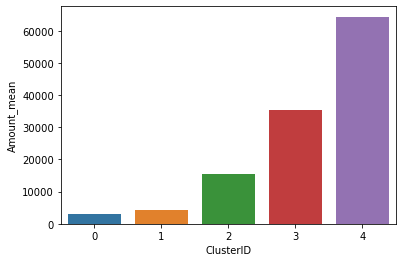

In [153]:
sns.barplot(x=df.ClusterID, y=df.Amount_mean)

<AxesSubplot:xlabel='ClusterID', ylabel='Frequency_mean'>

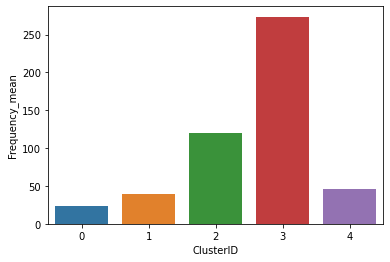

In [154]:
sns.barplot(x=df.ClusterID, y=df.Frequency_mean)

<AxesSubplot:xlabel='ClusterID', ylabel='Recency_mean'>

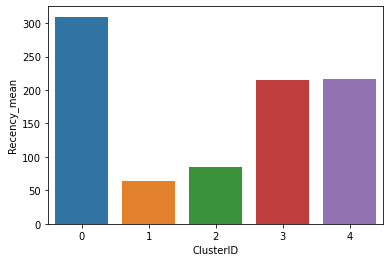

In [155]:
sns.barplot(x=df.ClusterID, y=df.Recency_mean)

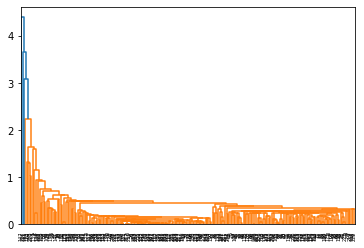

In [156]:
# heirarchical clustering
mergings = linkage(RFM_norm1, method = "single", metric='euclidean')
dendrogram(mergings)
plt.show()

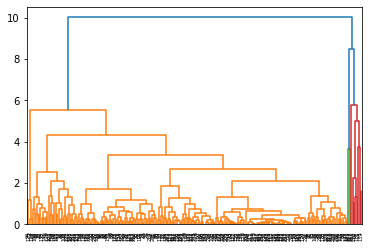

In [157]:
mergings = linkage(RFM_norm1, method = "complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [158]:
clusterCut = pd.Series(cut_tree(mergings, n_clusters = 5).reshape(-1,))
RFM_hc = pd.concat([rfm, clusterCut], axis=1)
RFM_hc.columns = ['CustomerID', 'Frequency', 'Amount', 'Recency', 'ClusterID']

In [159]:
#summarise
km_clusters_amount = pd.DataFrame(RFM_hc.groupby(["ClusterID"]).Amount.mean())
km_clusters_frequency = pd.DataFrame(RFM_hc.groupby(["ClusterID"]).Frequency.mean())
km_clusters_recency = pd.DataFrame(RFM_hc.groupby(["ClusterID"]).Recency.mean())

In [160]:
df9 = pd.concat([pd.Series([0,1,2,3,4]), km_clusters_amount, km_clusters_frequency, km_clusters_recency], axis=1)
df9.columns = ["ClusterID", "Amount_mean", "Frequency_mean", "Recency_mean"]
df9.head()

ClusterID   Amount_mean  Frequency_mean  Recency_mean
0          0   5126.520376       41.620536    193.906250
1          1  27766.424500      235.428571    232.714286
2          2    432.587675        7.000000    514.500000
3          3  65021.937800      343.000000     61.000000
4          4  64353.811150       46.000000    216.500000

<AxesSubplot:xlabel='ClusterID', ylabel='Amount_mean'>

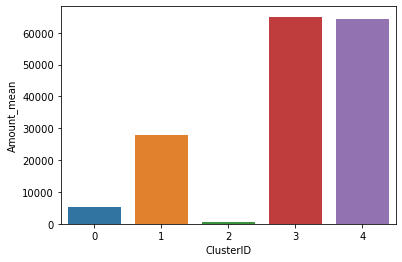

In [161]:
#plotting barplot
sns.barplot(x=df.ClusterID, y=df9.Amount_mean)

<AxesSubplot:xlabel='ClusterID', ylabel='Frequency_mean'>

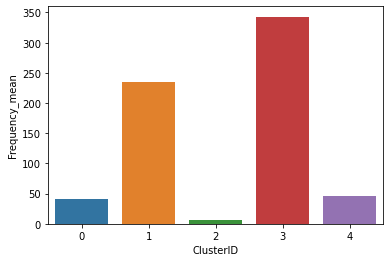

In [162]:
sns.barplot(x=df.ClusterID, y=df9.Frequency_mean)

<AxesSubplot:xlabel='ClusterID', ylabel='Recency_mean'>

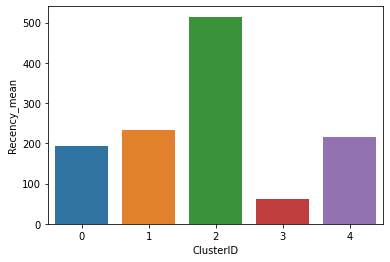

In [163]:
sns.barplot(x=df.ClusterID, y=df9.Recency_mean)

In [164]:
RFM_km

CustomerID  Frequency      Amount  Recency  ClusterID
0    2000958295742         24   1969.7546      338          0
1    2000958297731        285  23574.6501        0          3
2    2000958298665          9    272.5000      599          0
3    2000958298975          2    107.6460      309          0
4    2000958299032         28   6049.4535      337          0
..             ...        ...         ...      ...        ...
233  2200700495313          9    552.1800      307          0
234  2200700495818         33   6472.4407      244          0
235  2200700496280          6    372.1980      317          0
236  2200700496389         17   1286.5882      316          0
237  2200700497164         14    875.2347       91          1

[238 rows x 5 columns]

In [165]:
 rfmclusters = RFM_km.groupby(by='CustomerID',
                        as_index=False)['ClusterID'].max()
rfmclusters

CustomerID  ClusterID
0    2000958295742          0
1    2000958297731          3
2    2000958298665          0
3    2000958298975          0
4    2000958299032          0
..             ...        ...
233  2200700495313          0
234  2200700495818          0
235  2200700496280          0
236  2200700496389          0
237  2200700497164          1

[238 rows x 2 columns]

In [216]:
c1 = rfmclusters[(rfmclusters['ClusterID']==0)]
c1

CustomerID  ClusterID
0    2000958295742          0
2    2000958298665          0
3    2000958298975          0
4    2000958299032          0
9    2000958319757          0
..             ...        ...
232  2200700493982          0
233  2200700495313          0
234  2200700495818          0
235  2200700496280          0
236  2200700496389          0

[124 rows x 2 columns]

In [217]:
len(c1.index)

124

In [218]:
cluster1 = []
cluster1 = c1['CustomerID'].tolist()
cluster1

[2000958295742,
 2000958298665,
 2000958298975,
 2000958299032,
 2000958319757,
 2000958322392,
 2000958322797,
 2000958322952,
 2000958327259,
 2000958327718,
 2200095832784,
 2200095839294,
 2200095843158,
 2200095845735,
 2200095845838,
 2200095847117,
 2200095856684,
 2200095858979,
 2200095862205,
 2200095862336,
 2200095862413,
 2200095900118,
 2200095901413,
 2200095903718,
 2200095905073,
 2200095905197,
 2200095914077,
 2200095928276,
 2200095930956,
 2200095941609,
 2200095943548,
 2200095947569,
 2200095959690,
 2200095961979,
 2200095969587,
 2200100092556,
 2200200010634,
 2200200015110,
 2200200025126,
 2200200092913,
 2200200117081,
 2200200132169,
 2200200142991,
 2200200149495,
 2200200169875,
 2200200181624,
 2200200211208,
 2200200218580,
 2200200235426,
 2200200263535,
 2200200263931,
 2200200280051,
 2200200283144,
 2200200285384,
 2200200295895,
 2200300009712,
 2200300042368,
 2200300138740,
 2200300159349,
 2200300272291,
 2200300272741,
 2200300273595,
 2200300

In [172]:
df

Номенклатура3       №    Номер карты  \
0                               Сметана   52824  2200095914323   
1                                Молоко  102826  2200600024729   
2                                Зелень   54491  2200095929649   
3                                 Овощи   54323  2200095929649   
4                 Упаковочные материалы   54326  2200095929649   
...                                 ...     ...            ...   
11436                Бумажная продукция  106714  2200600330820   
11437  Консервы из рыбы и морепродуктов  106376  2200700124305   
11438       Сухие завтраки, каши, мюсли  105354  2200500132111   
11439                Масло растительное  105355  2200500132111   
11440                  Сгущенное молоко  105376  2200500132111   

                                        Маркет Номер Чека  Номенклатура.Код  \
0                Гипермаркет-12 (12 мкр Арзан)    388,357            102303   
1                          Гипермаркет-29 (BP)    422,604             23552   
2                     Гипермаркет-26 (Ак-Орго)    277,066             77314   
3                     Гипермаркет-26 (Ак-Орго)    277,066             76973   
4                     Гипермаркет-26 (Ак-Орго)    277,066             97671   
...                                        ...        ...               ...   
11436               Гипермаркет-38 (Элебесова)    230,894             71629   
11437                   Гипермаркет-24 (Манас)    456,623            172089   
11438  Гипермаркет-47 (ул. Махатма Ганди, 334)    253,418            172111   
11439  Гипермаркет-47 (ул. Махатма Ганди, 334)    253,418            172850   
11440  Гипермаркет-47 (ул. Махатма Ганди, 334)    253,418            162042   

           Дата Время Чека  Количество   Сумма        Дата  Время  \
0      01.11.2021 15:17:00        1.00   42.72  2021-11-01   15.0   
1      01.11.2021 19:27:00        1.00   44.00  2021-11-01   19.0   
2      01.11.2021 17:53:00        1.00   15.52  2021-11-01   17.0   
3      01.11.2021 17:53:00        0.34   30.00  2021-11-01   17.0   
4      01.11.2021 17:53:00        5.00   14.55  2021-11-01   17.0   
...                    ...         ...     ...         ...    ...   
11436  30.01.2022 22:24:00        1.00   23.99  2022-01-30   22.0   
11437  30.01.2022 11:44:00        1.00   77.11  2022-01-30   11.0   
11438  30.01.2022 13:05:00        1.00   86.00  2022-01-30   13.0   
11439  30.01.2022 13:05:00        2.00  238.00  2022-01-30   13.0   
11440  30.01.2022 13:05:00        1.00   66.01  2022-01-30   13.0   

                                     Наименование Товара  \
0                  СМЕТАНА БЕЛАЯ РЕКА 15% П/СТАКАН 180ГР   
1                         МОЛОКО УМУТ ПАСТЕРИЗОВ 3,2% 1Л   
2                                    ЗЕЛЕНЬ УКРОП 1ПУЧОК   
3                             ПЕРЕЦ ЛАСТОЧКА КРАСНЫЙ ВЕС   
4                             ПАКЕТ ФРУНЗЕ БИО(36*60)БОЛ   
...                                                  ...   
11436                                 КНИЖКА МЕДИЦИНСКАЯ   
11437            САРДИНА АЗБУКА МОРЯ ИВАСИ В МАСЛЕ 245ГР   
11438       ПАЛОЧКИ КУКУРУЗНЫЕ СЛАСТЕНА С ИГРУШКОЙ 200ГР   
11439        МАСЛО РАСТИТЕЛЬНОЕ БОГАТОВСКОЕ ЗОЛОТО 800МЛ   
11440  ПРОДУКТ СГУЩЕННЫЙ С САХАРОМ СГУЩЕНОЧКА 2,5% 45...   

                       Номенклатура1                    Номенклатура2  \
0               Сметана фас 170-200г               Сметана фасованная   
1         Молоко пастеризованное п/п           Молоко пастеризованное   
2                 Зелень упакованная               Зелень упакованная   
3                              Перцы                            Перцы   
4                Пакеты Фрунзе,Оазиз              Пакеты для хранения   
...                              ...                              ...   
11436    Книжки трудовые,медицинские       Блокноты и записные книжки   
11437       Консервы из рыбы сардины         Консервы из рыбы в масле   
11438    Палочки кукурузные 200-250г               Палочки кукурузные   
1143

In [173]:
kateg = {}
kategList = []
for i in c1['CustomerID']:
    
    for j in range(len(df)):
        if i == df['Номер карты'][j]:
            kategList.append(df['Категория'][j])

        kateg[i] = kategList


In [174]:
kateg

{2000958295742: ['Хозтовары',
  'Молочные продукты',
  'Кофе, кофейные напитки, чай',
  'Хлеб, хлебопродукты',
  'Кофе, кофейные напитки, чай',
  'Хлеб, хлебопродукты',
  'Масло растительное',
  'Молочные продукты',
  'Безалкогольные напитки, соки',
  'Гастрономия и кулинария',
  'Гастрономия и кулинария',
  'Хозтовары',
  'Масло растительное',
  'Алкогольные напитки, пиво',
  'Молочные продукты',
  'Хозтовары',
  'Алкогольные напитки, пиво',
  'Молочные продукты',
  'Бакалея',
  'Молочные продукты',
  'Консервы',
  'Консервы',
  'Хозтовары',
  'Молочные продукты',
  'Хозтовары',
  'Кофе, кофейные напитки, чай',
  'Кофе, кофейные напитки, чай',
  'Гастрономия и кулинария',
  'Молочные продукты',
  'Кофе, кофейные напитки, чай',
  'Гастрономия и кулинария',
  'Хлеб, хлебопродукты',
  'Кофе, кофейные напитки, чай',
  'Свежие фрукты, овощи, ягоды, грибы',
  'Свежие фрукты, овощи, ягоды, грибы',
  nan,
  nan,
  'Молочные продукты',
  'Бакалея',
  'Бакалея',
  'Молочные продукты',
  'Молочн

In [175]:
kat = pd.DataFrame.from_dict(kateg)
kat

2000958295742                2000958298665  \
0                       Хозтовары                    Хозтовары   
1               Молочные продукты            Молочные продукты   
2     Кофе, кофейные напитки, чай  Кофе, кофейные напитки, чай   
3             Хлеб, хлебопродукты          Хлеб, хлебопродукты   
4     Кофе, кофейные напитки, чай  Кофе, кофейные напитки, чай   
...                           ...                          ...   
2924                      Бакалея                      Бакалея   
2925         Кондитерские изделия         Кондитерские изделия   
2926                      Бакалея                      Бакалея   
2927         Кондитерские изделия         Кондитерские изделия   
2928       Косметика и парфюмерия       Косметика и парфюмерия   

                    2000958298975                2000958299032  \
0                       Хозтовары                    Хозтовары   
1               Молочные продукты            Молочные продукты   
2     Кофе, кофейные напитки, чай  Кофе, кофейные напитки, чай   
3             Хлеб, хлебопродукты          Хлеб, хлебопродукты   
4     Кофе, кофейные напитки, чай  Кофе, кофейные напитки, чай   
...                           ...                          ...   
2924                      Бакалея                      Бакалея   
2925         Кондитерские изделия         Кондитерские изделия   
2926                      Бакалея                      Бакалея   
2927         Кондитерские изделия         Кондитерские изделия   
2928       Косметика и парфюмерия       Косметика и парфюмерия   

                    2000958319757                2000958322392  \
0                       Хозтовары                    Хозтовары   
1               Молочные продукты            Молочные продукты   
2     Кофе, кофейные напитки, чай  Кофе, кофейные напитки, чай   
3             Хлеб, хлебопродукты          Хлеб, хлебопродукты   
4     Кофе, кофейные напитки, чай  Кофе, кофейные напитки, чай   
...                           ...                          ...   
2924                      Бакалея                      Бакалея   
2925         Кондитерские изделия         Кондитерские изделия   
2926                      Бакалея                      Бакалея   
2927         Кондитерские изделия         Кондитерские изделия   
2928       Косметика и парфюмерия       Косметика и парфюмерия   

                    2000958322797                2000958322952  \
0                       Хозтовары                    Хозтовары   
1               Молочные продукты            Молочные продукты   
2     Кофе, кофейные напитки, чай  Кофе, кофейные напитки, чай   
3             Хлеб, хлебопродукты          Хлеб, хлебопродукты   
4     Кофе, кофейные напитки, чай  Кофе, кофейные напитки, чай   
...                           ...                          ...   
2924                      Бакалея                      Бакалея   
2925         Кондитерские изделия         Кондитерские изделия   
2926                      Бакалея                      Бакалея   
2927         Кондитерские изделия         Кондитерские изделия   
2928       Косметика и парфюмерия       Косметика и парфюмерия   

                    2000958327259                2000958327718  ...  \
0                       Хозтовары                    Хозтовары  ...   
1               Молочные продукты            Молочные продукты  ...   
2     Кофе, кофейные напитки, чай  Кофе, кофейные напитки, чай  ...   
3             Хлеб, хлебопродукты          Хлеб, хлебопродукты  ...   
4     Кофе, кофейные напитки, чай  Кофе, кофейные напитки, чай  ...   
...                           ...                          ...  ...   
2924                      Бакалея                      Бакалея  ...   
2925         Кондитерские изделия         Кондитерские изделия  ...   
2926                      Бакалея                      Бакалея  ...   
2927         Кондитерские изделия         Кондитерские изделия  ...   
2928       Косметика и парфюмерия       Косметика и парфюмерия  ...

In [176]:
#характеристика класстеров(сегментаций)
df9

ClusterID   Amount_mean  Frequency_mean  Recency_mean
0          0   5126.520376       41.620536    193.906250
1          1  27766.424500      235.428571    232.714286
2          2    432.587675        7.000000    514.500000
3          3  65021.937800      343.000000     61.000000
4          4  64353.811150       46.000000    216.500000

In [177]:
#размер класстера(кол-во людей)
#cluster1 - 124/238 - 52.1%
#cluster2 - 73/238 - 30.6%
#cluster3 - 33/238 - 13.8%
#cluster4 - 6/238 - 2.5% 
#cluster5 - 2/238 - 0.8%


In [178]:
df9

ClusterID   Amount_mean  Frequency_mean  Recency_mean
0          0   5126.520376       41.620536    193.906250
1          1  27766.424500      235.428571    232.714286
2          2    432.587675        7.000000    514.500000
3          3  65021.937800      343.000000     61.000000
4          4  64353.811150       46.000000    216.500000

In [179]:
#frequency per week  
fpw = df9['Frequency_mean'] / 12
fpw

0     3.468378
1    19.619048
2     0.583333
3    28.583333
4     3.833333
Name: Frequency_mean, dtype: float64

In [180]:
#monetary value per week
mvpv = df9['Amount_mean'] / 12
mvpv

0     427.210031
1    2313.868708
2      36.048973
3    5418.494817
4    5362.817596
Name: Amount_mean, dtype: float64

In [190]:
#avg basket 
avgb = mvpv / fpw
avgb

0     123.172859
1     117.939910
2      61.798239
3     189.568332
4    1398.995895
dtype: float64

In [194]:
#quantity of people in each segment 
qps = [124, 73, 33, 6 ,2]

In [213]:
pap = []
#percentage of all people
for i in qps:
    pap.append(i / 238)


In [214]:
pap

[0.5210084033613446,
 0.3067226890756303,
 0.13865546218487396,
 0.025210084033613446,
 0.008403361344537815]

In [215]:
frame = { 'frequency per week': fpw, 'monetary value per week': mvpv, 'avg basket ': avgb, 'quantity of people in each segment' : qps, 'percentage of all people' : pap }
  
result = pd.DataFrame(frame)
  
result

frequency per week  monetary value per week  avg basket   \
0            3.468378               427.210031   123.172859   
1           19.619048              2313.868708   117.939910   
2            0.583333                36.048973    61.798239   
3           28.583333              5418.494817   189.568332   
4            3.833333              5362.817596  1398.995895   

   quantity of people in each segment  percentage of all people  
0                                 124                  0.521008  
1                                  73                  0.306723  
2                                  33                  0.138655  
3                                   6                  0.025210  
4                                   2                  0.008403